# Making a Prediction

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import numpy as np
import tensorflow as tf
import requests
from PIL import Image
import matplotlib.pyplot as plt

Assuming we achieved pretty good accuracy during the training and testing phases, we can now use the trained model for inference &mdash; in other words, to predict the classification of images that the network has never seen before.

But before we move on, we'll load the code you've already seen in previous notebooks:

In [2]:
import wget

if not os.path.exists('kintro.py'):
    wget.download('https://raw.githubusercontent.com/MicrosoftDocs/tensorflow-learning-path/main/intro-keras/kintro.py', 'kintro.py') 

from kintro import *

Remember that in the previous notebook, after successfully training our network, we saved the model. Let's load it back into memory.

In [3]:
model = tf.keras.models.load_model('models')

Making a prediction is easy &mdash; we simply call the model's `predict` method and pass one or more images. Let's start by geting the image we'll use for prediction, and let's display it:

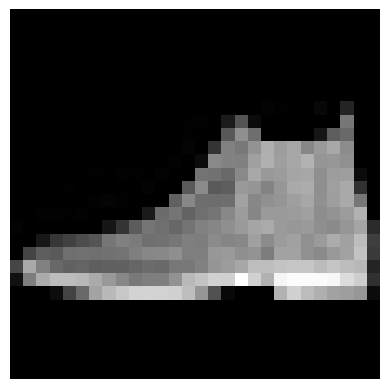

In [4]:
url = 'https://raw.githubusercontent.com/MicrosoftDocs/tensorflow-learning-path/main/intro-keras/predict-image.png'

with Image.open(requests.get(url, stream=True).raw) as image:
  X = np.asarray(image, dtype=np.float32).reshape((-1, 28, 28)) / 255.0

plt.figure()
plt.axis('off')
plt.imshow(X.squeeze(), cmap='gray')
plt.show()

As you can see, we have an image of an ankle boot. In the code below, we load the image, call `predict` to get its class index, and map that index to the class name.  

In [5]:
predicted_vector = model.predict(X)
predicted_index = np.argmax(predicted_vector)
predicted_name = labels_map[predicted_index]

print(f'Predicted class: {predicted_name}')

1/1 [==============================] - 0s 137ms/step
Predicted class: Ankle Boot


Note that you can also get probabilities of the input image being of a certain class, in which case we need to normalize the output of our network using `softmax` to get probabilities. Here are the predictions for our image: 

In [6]:
probs = tf.nn.softmax(predicted_vector.reshape((-1,)))
for i,p in enumerate(probs):
    print(f'{labels_map[i]} -> {p:.3f}')

T-Shirt -> 0.000
Trouser -> 0.000
Pullover -> 0.000
Dress -> 0.000
Coat -> 0.000
Sandal -> 0.160
Shirt -> 0.000
Sneaker -> 0.236
Bag -> 0.002
Ankle Boot -> 0.602


If you need to compute probabilities often, you can specify `activation='softmax'` for the final `Dense` layer of your network. In this case the network would give you probabilities as output, and you need to omit `use_logits=True` in the `SparseCategoricalCrossentropy` loss function. 